,RSA,2,1,764.7000002179993,2425.799999400624
0,RSA,2,2,135.300001,1609.300001
1,RSA,2,3,123.400001,903.800001
2,RSA,2,4,90.599999,895.800000
3,RSA,2,5,128.000001,1214.000000
4,RSA,2,6,161.600001,1209.500000


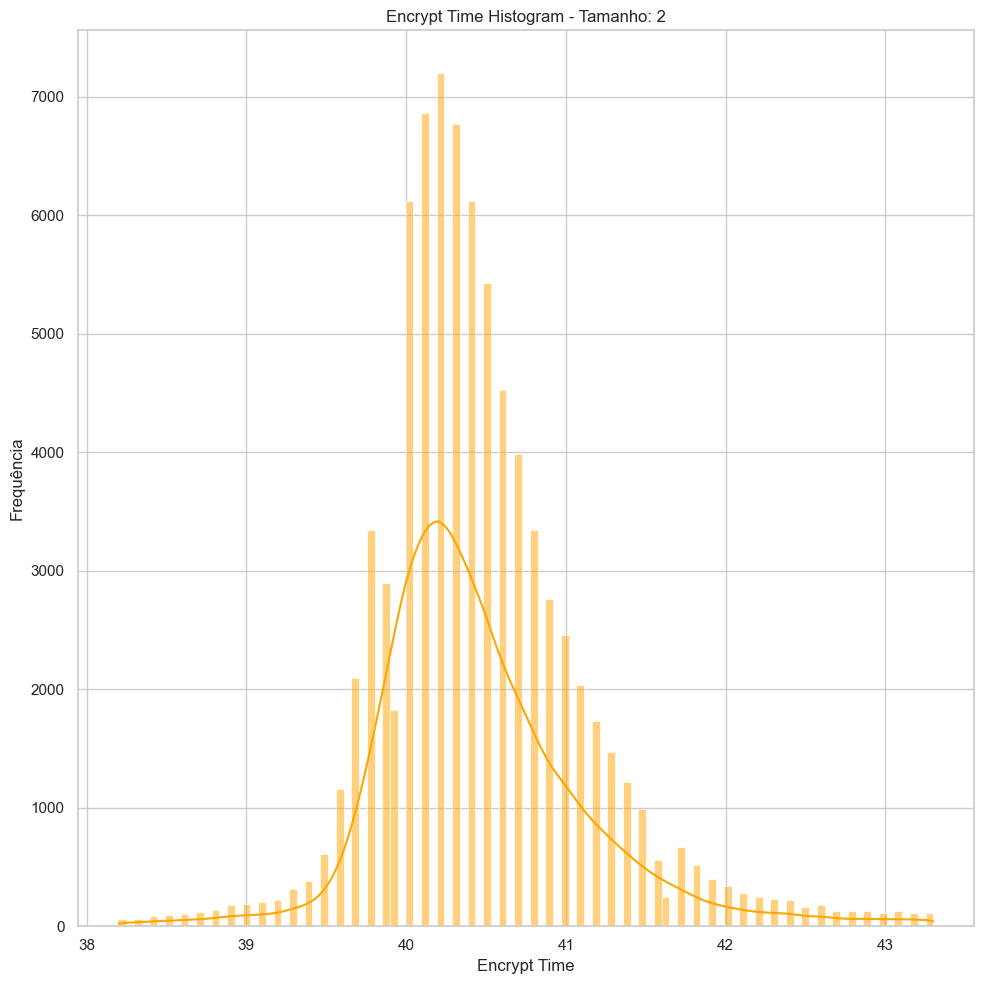

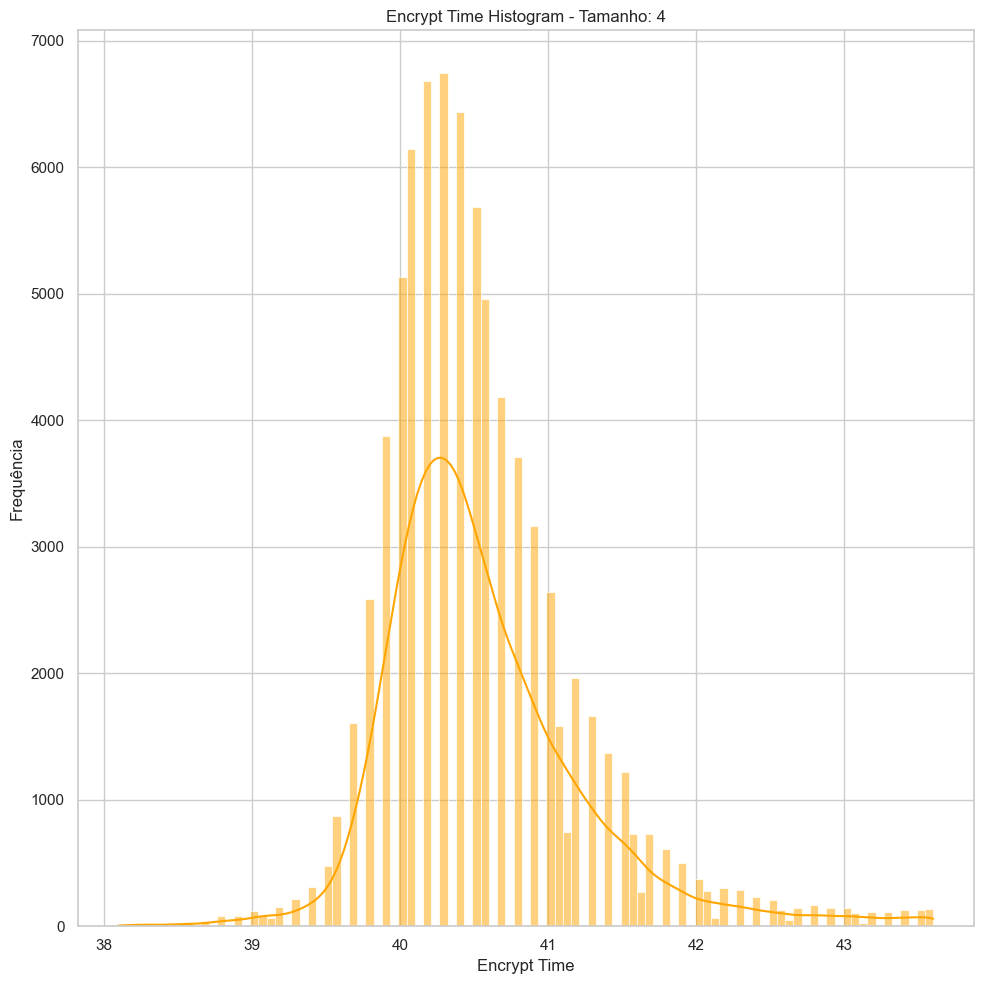

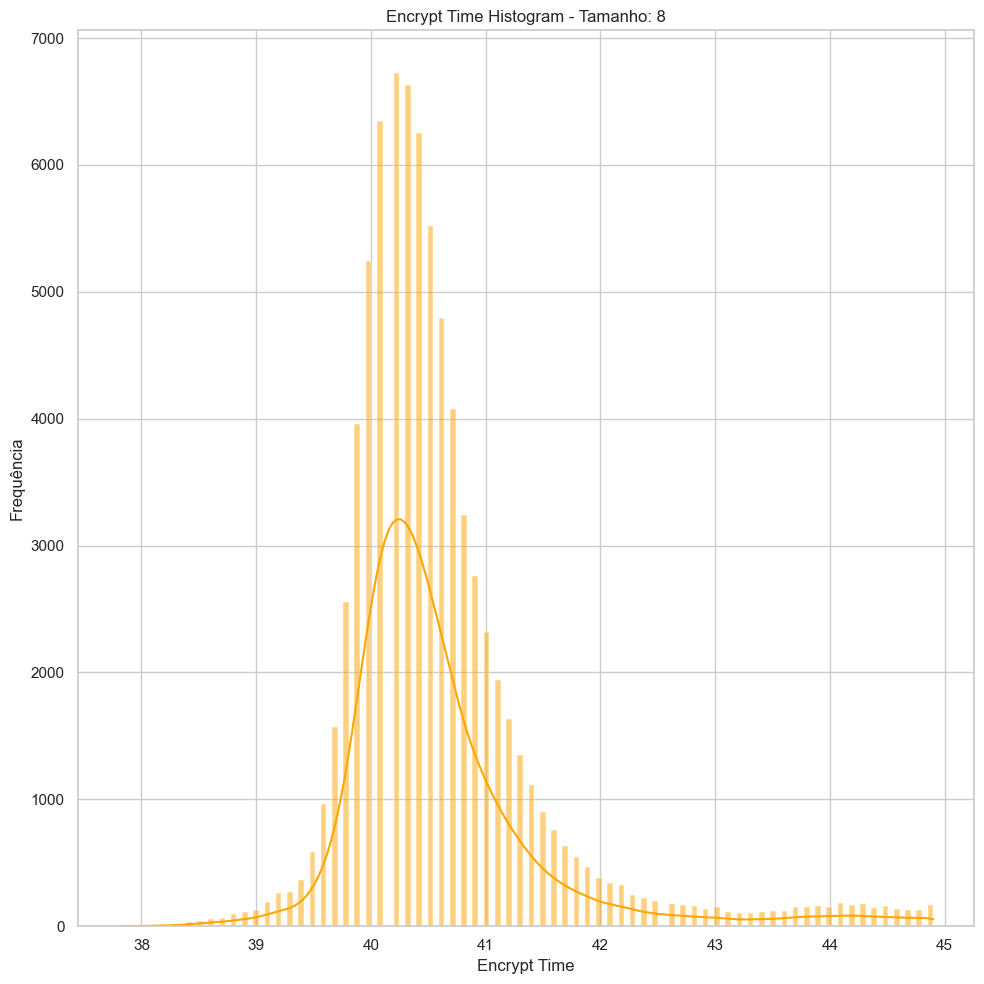

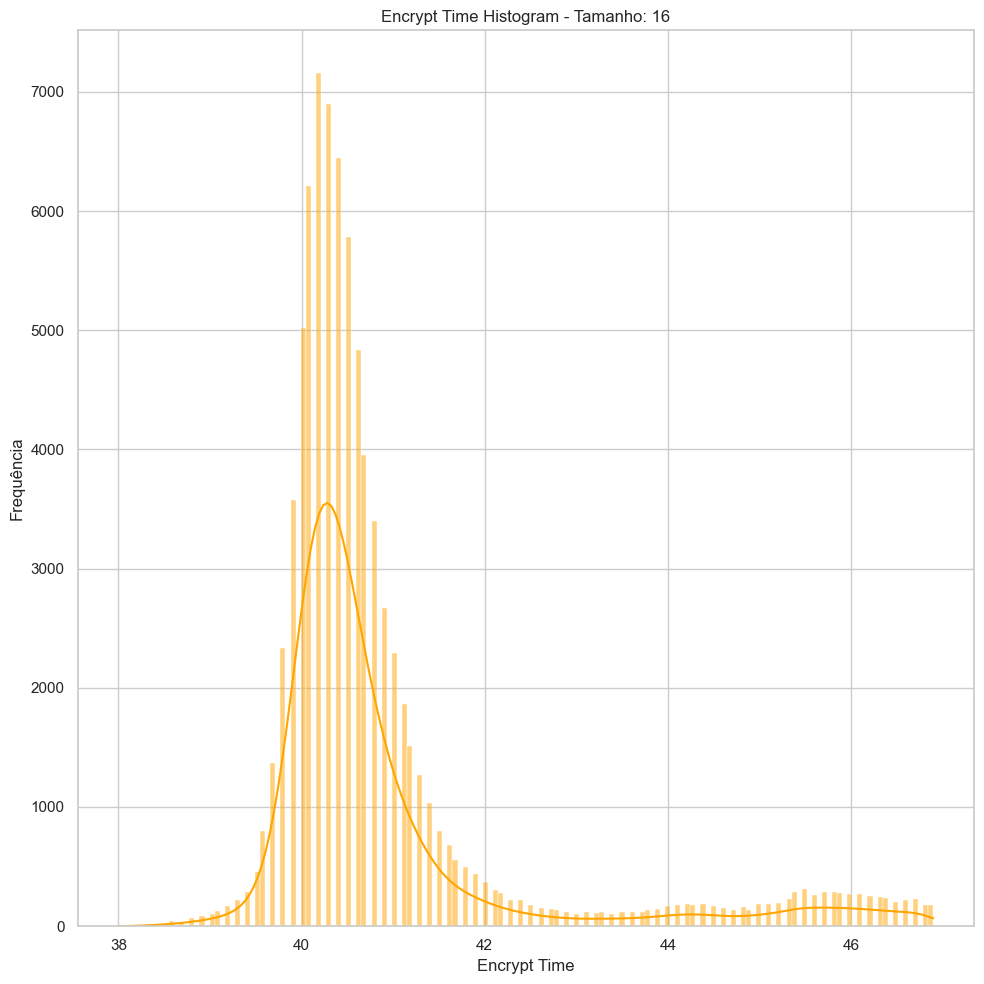

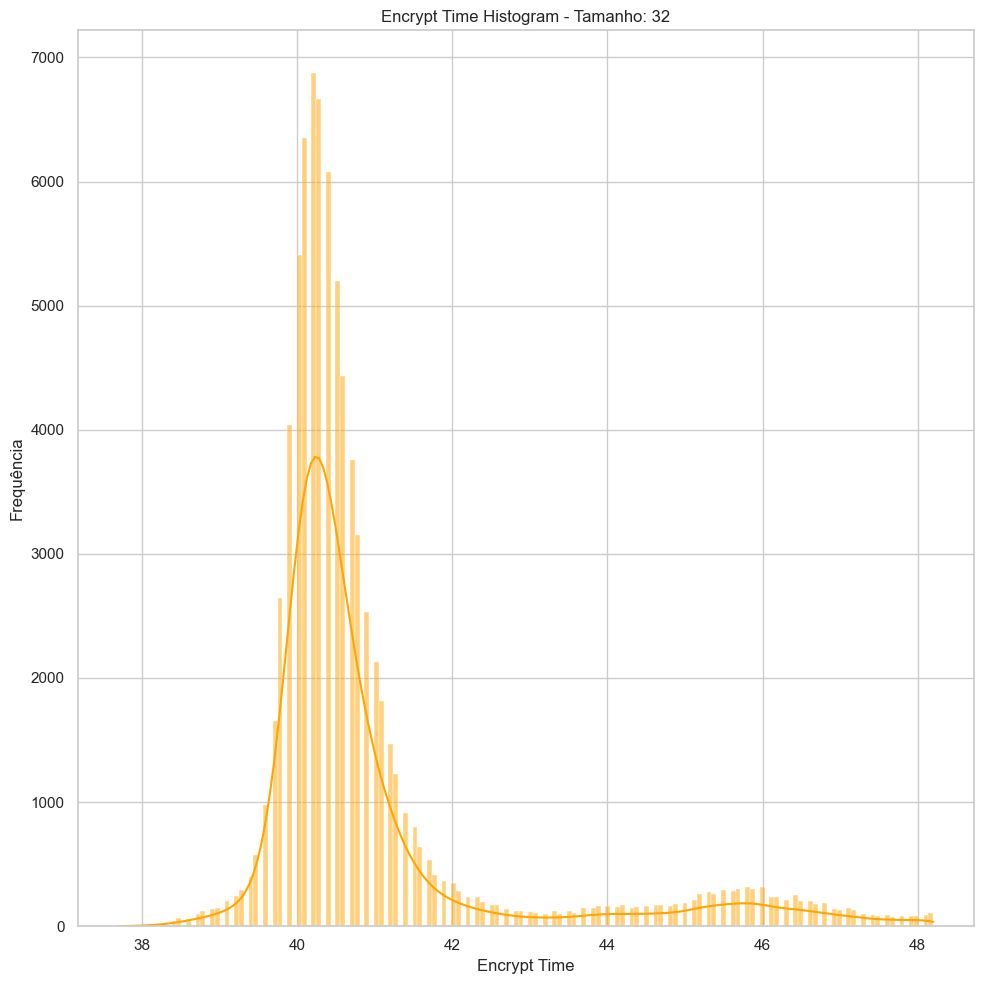

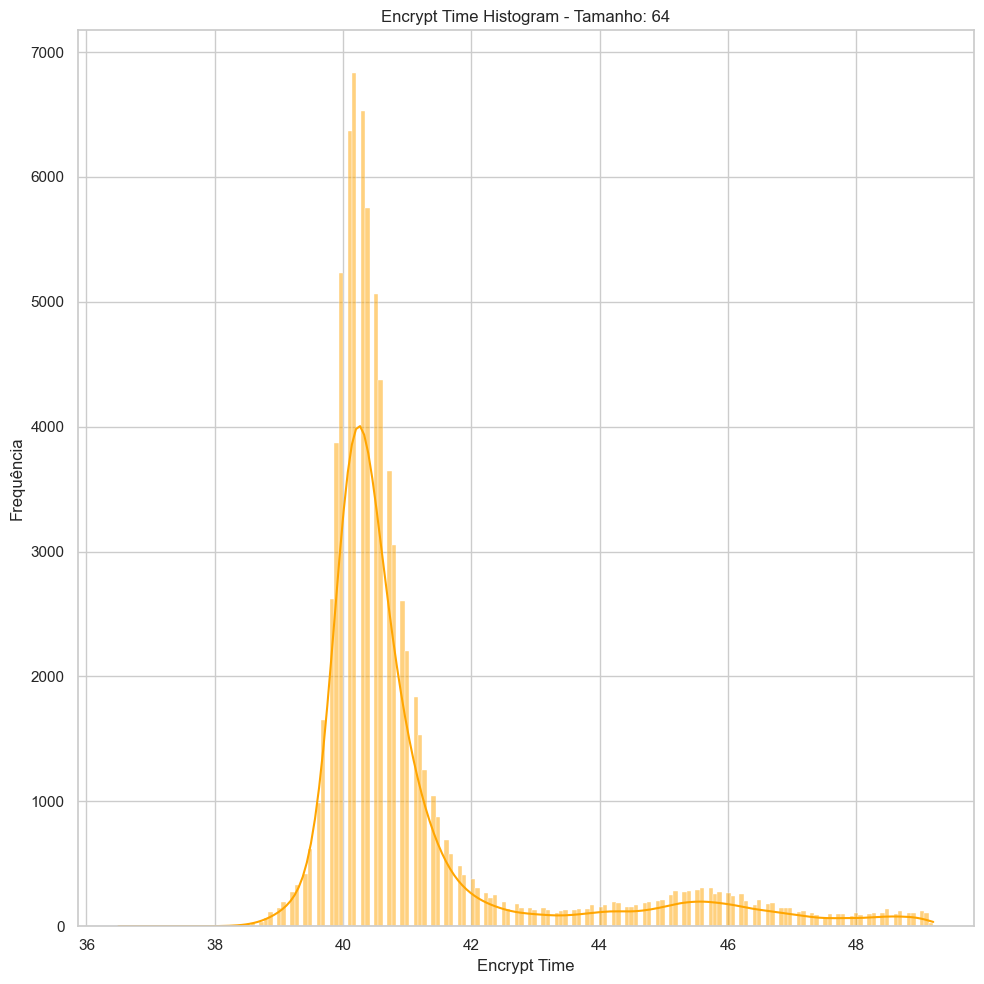

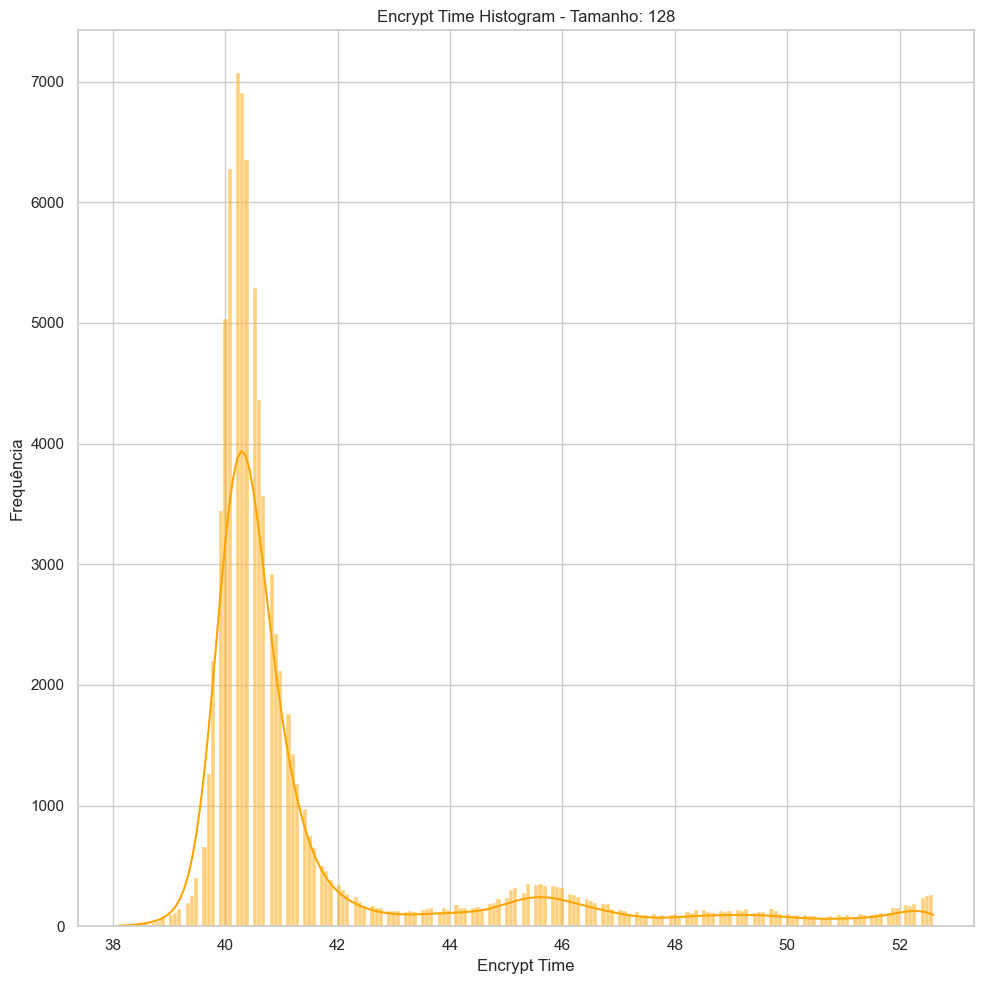

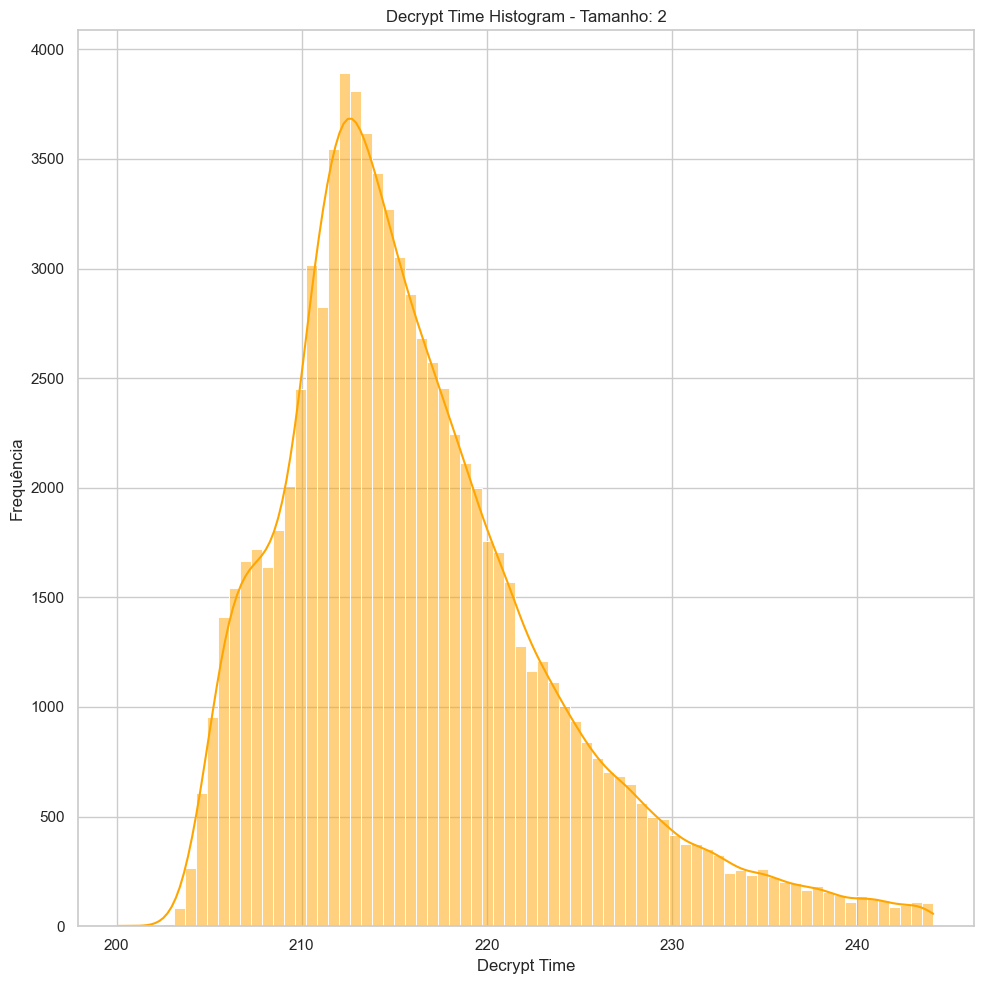

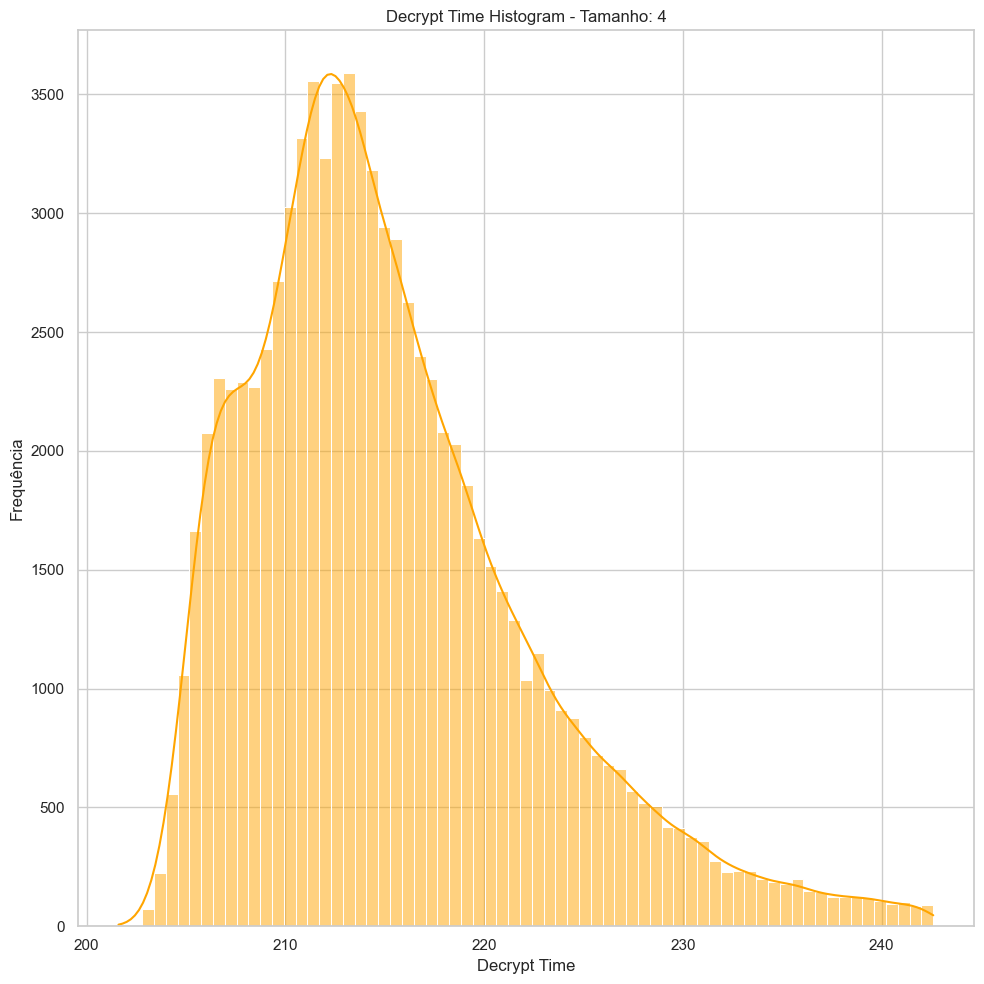

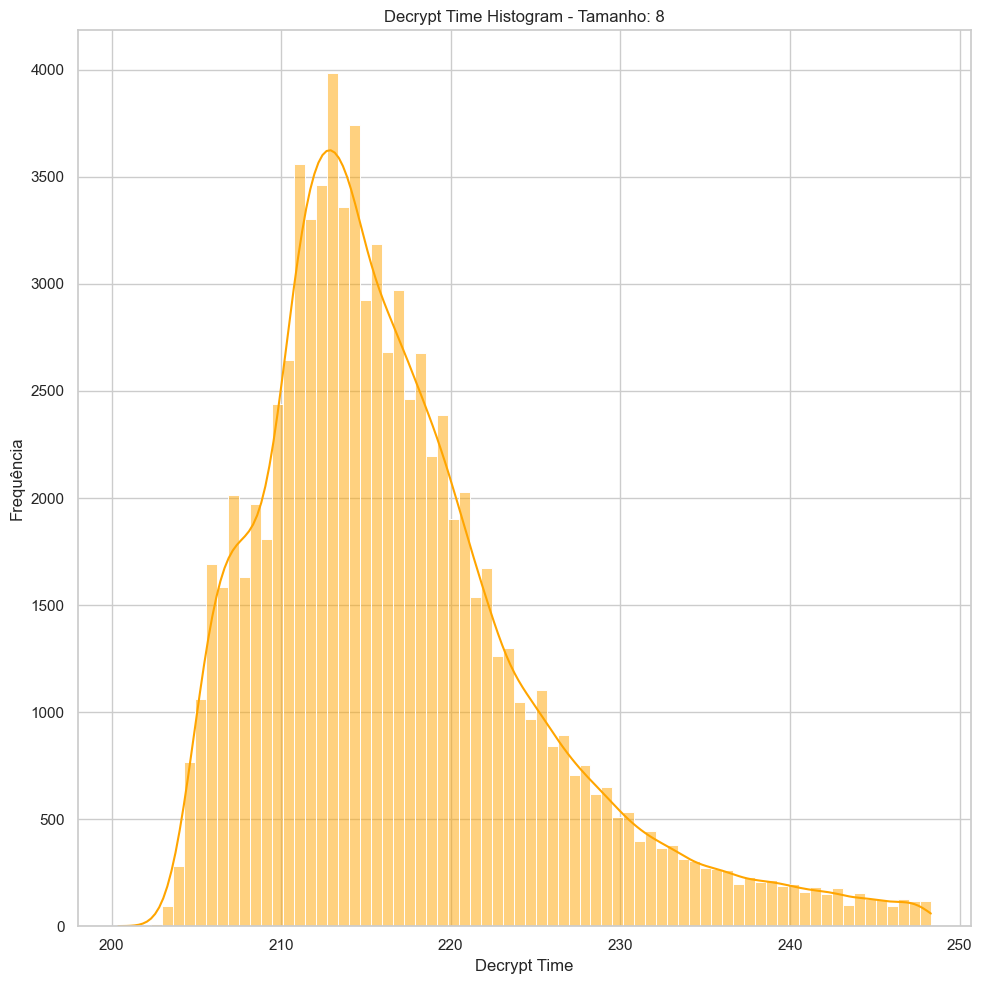

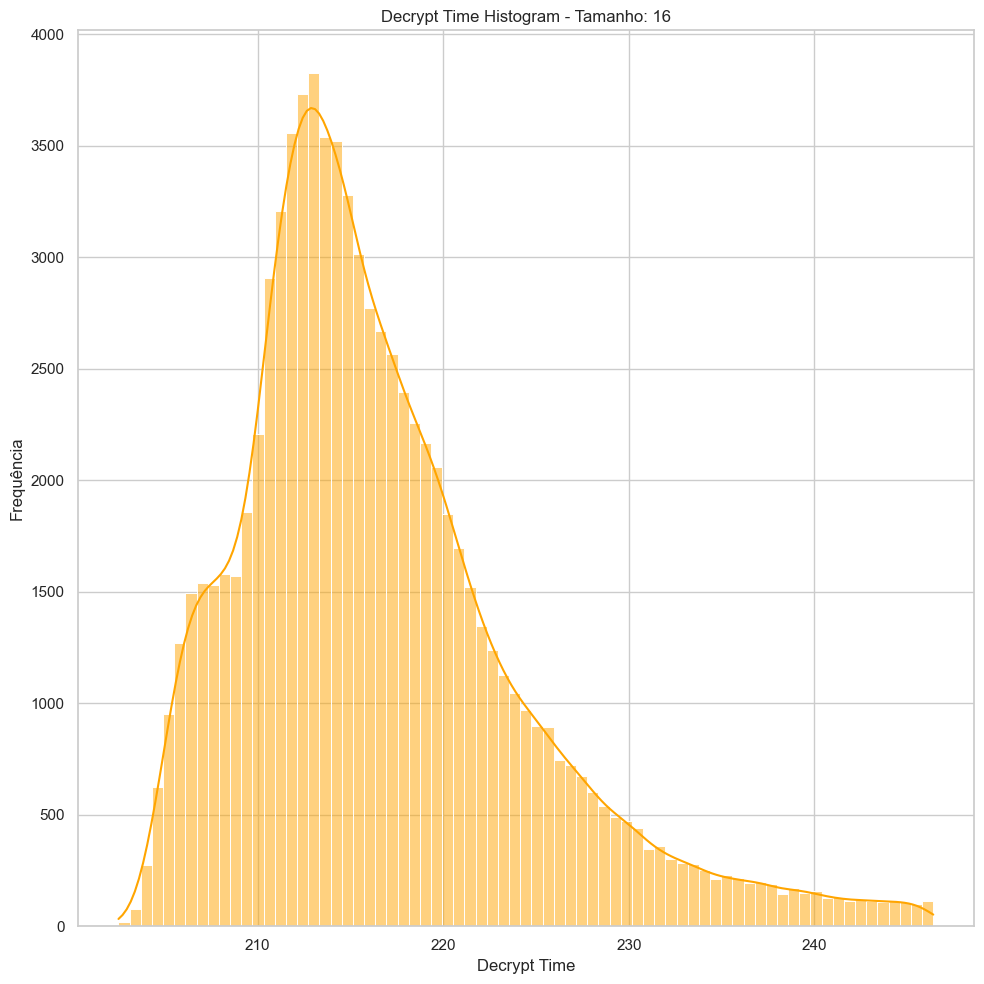

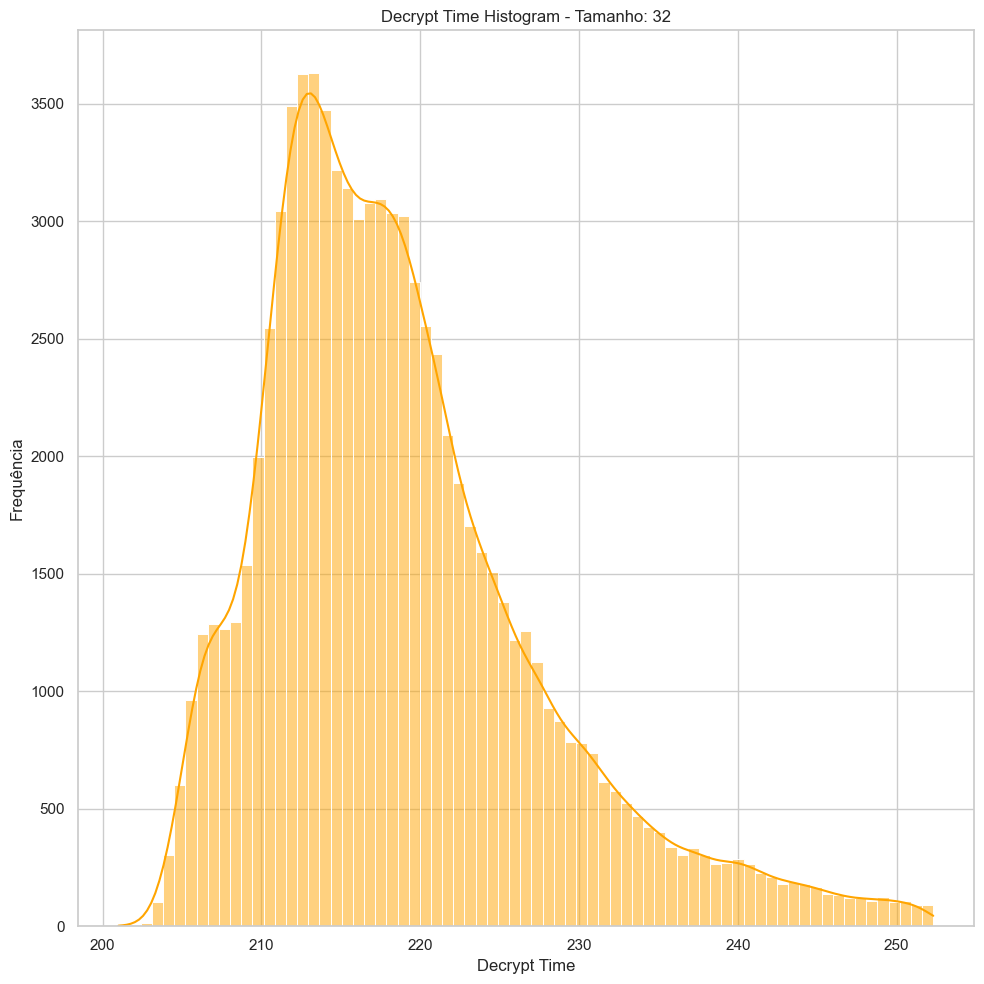

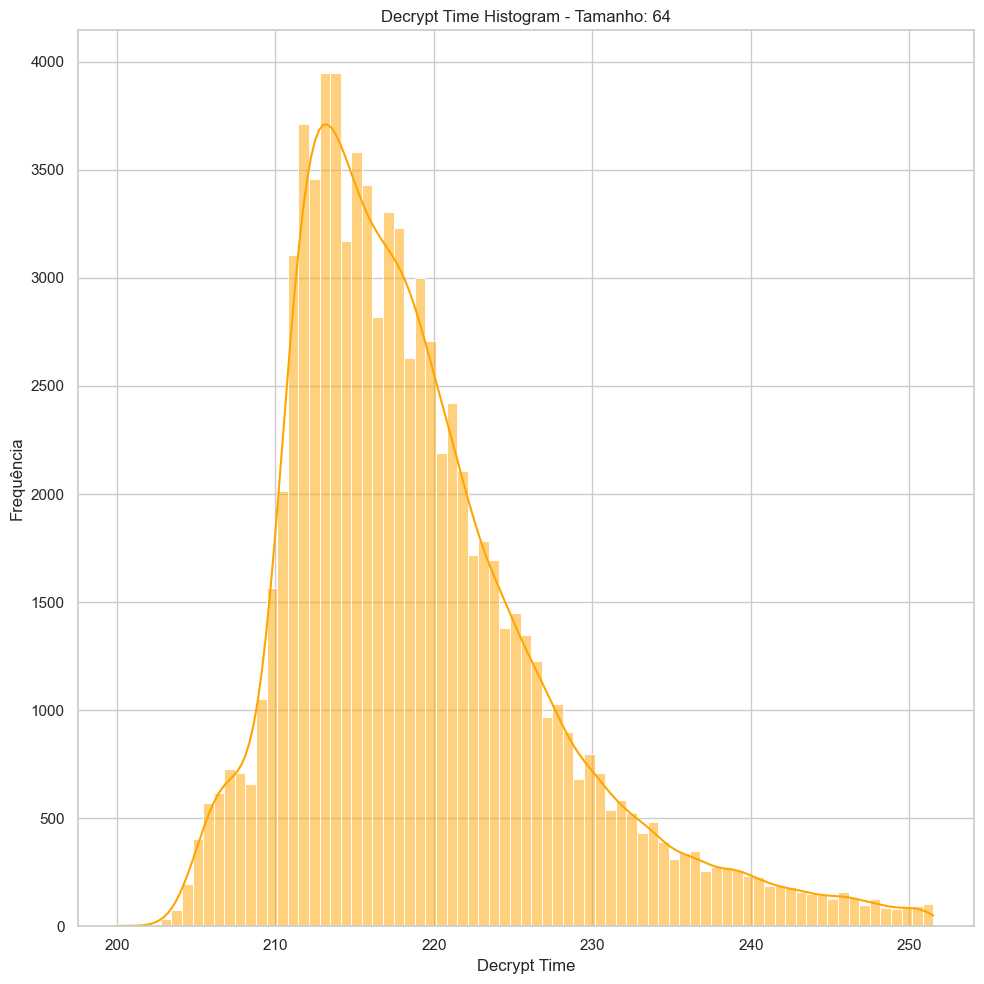

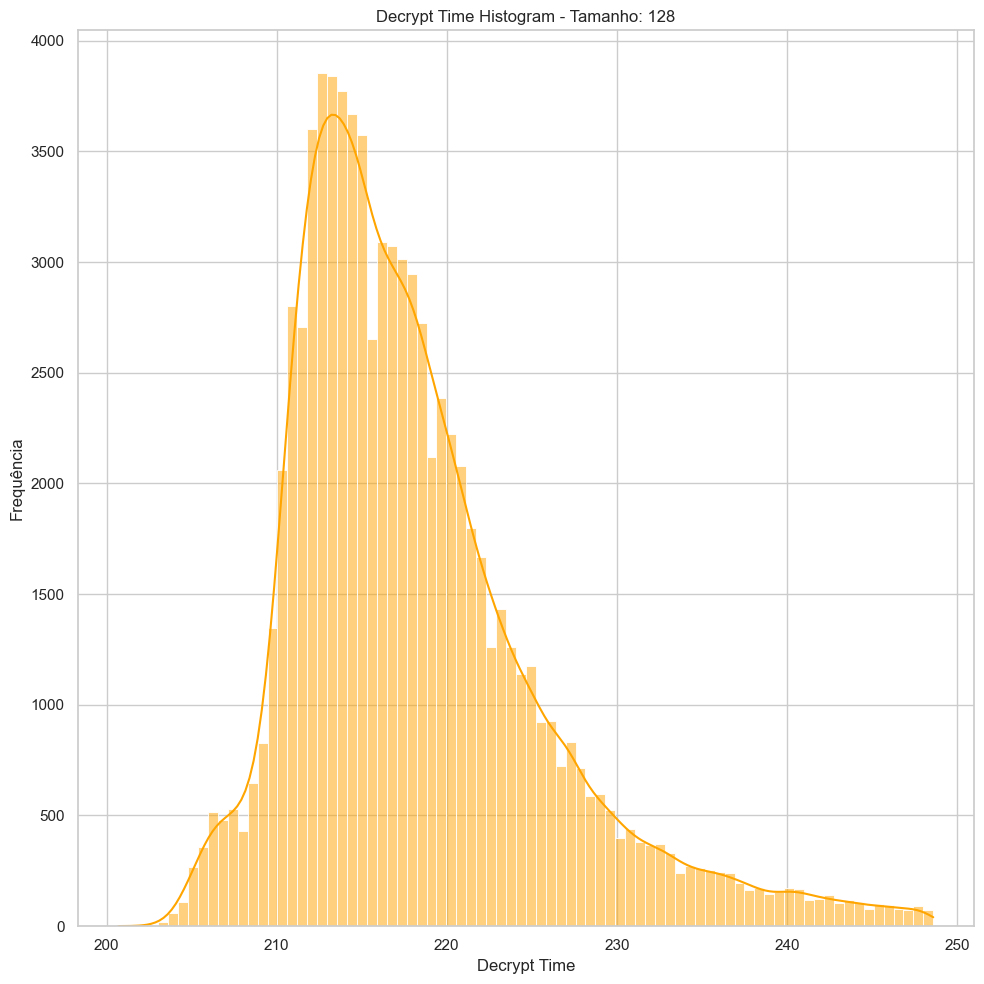

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import iqr

# Lê o ficheiro CSV
df = pd.read_csv('rsa_s.csv')

# Remove linhas com valores nulos nas colunas necessárias
df = df.dropna(subset=['tempo_incrypt', 'tempo_decrypt', 'tamanho'])

# Função para remover outliers usando o método IQR
def remove_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr_value = q3 - q1
    lower = q1 - 1.5 * iqr_value
    upper = q3 + 1.5 * iqr_value
    return data[(data >= lower) & (data <= upper)]

# Estilo do gráfico
sns.set(style='whitegrid')

# Loop por cada tamanho de ficheiro único para tempo_incrypt
for tamanho_valor in df['tamanho'].unique():
    subset = df[df['tamanho'] == tamanho_valor]['tempo_incrypt']
    subset_clean = remove_outliers(subset)


    # Escolher o número ideal de bins com base na regra de Freedman-Diaconis
    bin_width = 2 * iqr(subset_clean) / (len(subset_clean) ** (1/3))
    bin_width *= 1.5  # Aumenta a largura dos bins em 50%
    if bin_width == 0:
        continue  # Evita erro se IQR for 0
    bins = int((subset_clean.max() - subset_clean.min()) / bin_width)

    # Plot do histograma
    plt.figure(figsize=(10,10))
    sns.histplot(subset_clean, bins=bins, kde=True, color='orange')
    plt.title(f'Encrypt Time Histogram - Tamanho: {tamanho_valor}')
    plt.xlabel('Encrypt Time')
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()

# Loop por cada tamanho de ficheiro único para tempo_decrypt
for tamanho_valor in df['tamanho'].unique():
    subset = df[df['tamanho'] == tamanho_valor]['tempo_decrypt']
    subset_clean = remove_outliers(subset)

    if len(subset_clean) < 50:
        continue  # Ignora se menos de 50 amostras após remover outliers

    # Escolher o número ideal de bins com base na regra de Freedman-Diaconis
    bin_width = 2 * iqr(subset_clean) / (len(subset_clean) ** (1/3))
    bin_width *= 1.5  # Aumenta a largura dos bins em 50%
    if bin_width == 0:
        continue  # Evita erro se IQR for 0
    bins = int((subset_clean.max() - subset_clean.min()) / bin_width)

    # Plot do histograma
    plt.figure(figsize=(10,10))
    sns.histplot(subset_clean, bins=bins, kde=True, color='orange')
    plt.title(f'Decrypt Time Histogram - Tamanho: {tamanho_valor}')
    plt.xlabel('Decrypt Time')
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()